In [45]:
import seaborn as sns
import pandas as pd
import os
from pathlib import Path
from matplotlib import pyplot as plt


In [46]:
resource_df = Path(os.path.abspath('../resources/dataframe'))
hive = pd.read_csv(resource_df/'hive.csv')
hive['Project_Name'] = 'hive'
cassandra = pd.read_csv(resource_df/'cassandra.csv')
cassandra['Project_Name'] = 'cassandra'
dubbo = pd.read_csv(resource_df/'dubbo.csv')
dubbo['Project_Name'] = 'dubbo'
flink = pd.read_csv(resource_df/'flink.csv')
flink['Project_Name'] = 'flink'

In [47]:
resource = [hive, cassandra, dubbo, flink]
resource_df = pd.concat(resource).reset_index(drop=True).drop(columns=['Unnamed: 0'])

resource_df

,Test_Smell_Type,Amount,Year,Test_Smell_Total,Test_Method_Total,Star,Density_test_smell,Density_each_test_smell,Project_Name
0,Assertion Roulette,20,2015,167,74,570,2.256757,0.270270,hive
1,Conditional Test Logic,3,2015,167,74,570,2.256757,0.040541,hive
2,Constructor Initialization,0,2015,167,74,570,2.256757,0.000000,hive
3,Default Test,0,2015,167,74,570,2.256757,0.000000,hive
4,EmptyTest,0,2015,167,74,570,2.256757,0.000000,hive
...,...,...,...,...,...,...,...,...,...
375,Unknown Test,2620,2019,29925,14401,11040,2.077981,0.181932,flink
376,IgnoredTest,434,2019,29925,14401,11040,2.077981,0.030137,flink
377,Resource Optimism,322,2019,29925,14401,11040,2.077981,0.022360,flink
378,Magic Number Test,10659,2019,29925,14401,11040,2.077981,0.740157,flink


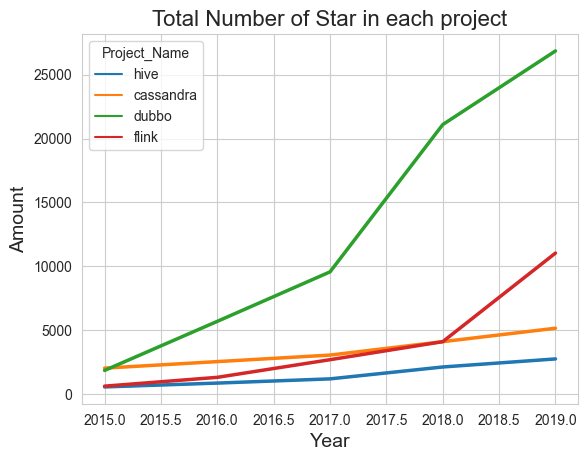

In [48]:
grouped = resource_df.set_index('Year')

sns.lineplot(data=grouped,x='Year',y='Star', hue='Project_Name',linewidth=2.5, dashes=False)
plt.title('Total Number of Star in each project', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.show()

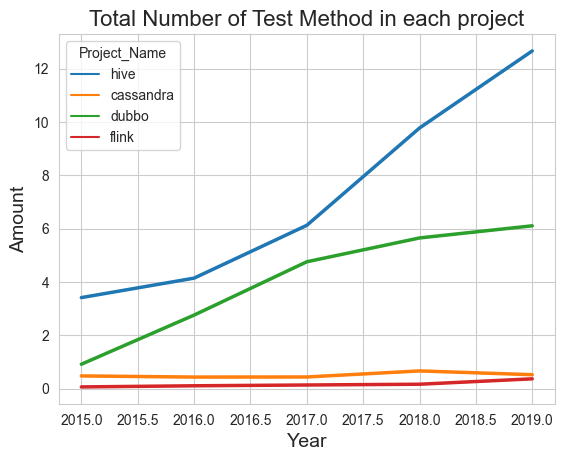

In [51]:
sns.lineplot(data=grouped,x='Year',y='Test_Method_Total', hue='Project_Name',linewidth=2.5, dashes=False)
plt.title('Total Number of Test Method in each project', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.show()

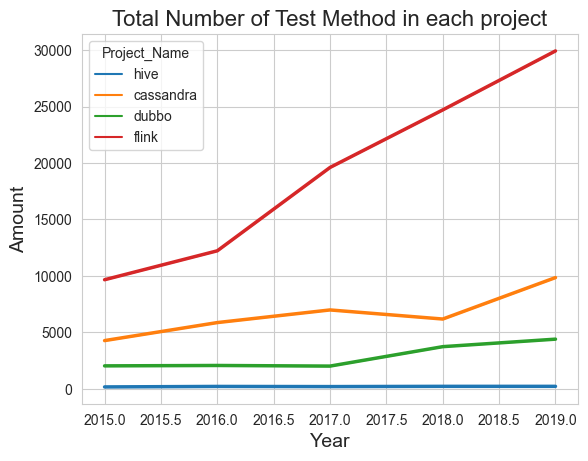

In [50]:
sns.lineplot(data=grouped,x='Year',y='Test_Smell_Total', hue='Project_Name',linewidth=2.5, dashes=False)
plt.title('Total Number of Test Method in each project', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.show()

In [53]:
grouped['Star/test_smell'] = grouped['Star']/grouped['Test_Smell_Total']

grouped

,Test_Smell_Type,Amount,Test_Smell_Total,Test_Method_Total,Star,Density_test_smell,Density_each_test_smell,Project_Name,Star/test_smell
Year,,,,,,,,,
2015,Assertion Roulette,20,167,74,570,2.256757,0.270270,hive,3.413174
2015,Conditional Test Logic,3,167,74,570,2.256757,0.040541,hive,3.413174
2015,Constructor Initialization,0,167,74,570,2.256757,0.000000,hive,3.413174
2015,Default Test,0,167,74,570,2.256757,0.000000,hive,3.413174
2015,EmptyTest,0,167,74,570,2.256757,0.000000,hive,3.413174
...,...,...,...,...,...,...,...,...,...
2019,Unknown Test,2620,29925,14401,11040,2.077981,0.181932,flink,0.368922
2019,IgnoredTest,434,29925,14401,11040,2.077981,0.030137,flink,0.368922
2019,Resource Optimism,322,29925,14401,11040,2.077981,0.022360,flink,0.368922
